[출처](https://www.datamanim.com/dataset/ADPpb/00/27.html)  

# 머신러닝
## 1. 데이터 확인 및 전처리

**데이터 설명**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

- UnitPrice: Unit price. Numeric, Product price per unit in sterling.

- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal, the name of the country where each customer resides.- 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


### 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시

In [14]:
# 소비자별 구매빈도 계산
customer_fre = df.groupby('CustomerID', as_index = False).count()[['CustomerID', 'InvoiceNo']]
customer_fre

,CustomerID,InvoiceNo
0,12348.0,31
1,12349.0,73
2,12350.0,17
3,12352.0,95
4,12354.0,58
...,...,...
343,14935.0,10
344,14936.0,366
345,14937.0,35
346,16321.0,16


In [20]:
# 소비자별 총 구매액 계산
customer_price = df.copy()
customer_price['M'] = customer_price['Quantity'] * customer_price['UnitPrice']
customer_price = customer_price.groupby('CustomerID', as_index=False)[['M']].sum()
customer_price

,CustomerID,M
0,12348.0,1797.24
1,12349.0,1757.55
2,12350.0,334.40
3,12352.0,1545.41
4,12354.0,1079.40
...,...,...
343,14935.0,1784.71
344,14936.0,8117.42
345,14937.0,1617.63
346,16321.0,230.70


In [64]:
# 두 데이터 병합
customer_df = customer_fre.merge(customer_price, on='CustomerID')
customer_df.columns = ['CustomerID', 'F', 'M']
customer_df

,CustomerID,F,M
0,12348.0,31,1797.24
1,12349.0,73,1757.55
2,12350.0,17,334.40
3,12352.0,95,1545.41
4,12354.0,58,1079.40
...,...,...,...
343,14935.0,10,1784.71
344,14936.0,366,8117.42
345,14937.0,35,1617.63
346,16321.0,16,230.70


In [65]:
display(customer_df.sort_values(['F'], ascending=False).head(5))
display(customer_df.sort_values(['M'], ascending=False).head(5))

,CustomerID,F,M
337,14911.0,5903,132572.62
336,14646.0,2085,279489.02
331,14156.0,1420,113384.14
40,12415.0,778,123725.45
243,12681.0,646,13677.59


,CustomerID,F,M
336,14646.0,2085,279489.02
337,14911.0,5903,132572.62
40,12415.0,778,123725.45
331,14156.0,1420,113384.14
281,12731.0,277,18793.41


In [66]:
display(customer_df.sort_values(['F']).head(5))
display(customer_df.sort_values(['M']).head(5))

,CustomerID,F,M
106,12505.0,1,-4.5
104,12503.0,1,-1126.0
304,12791.0,2,192.6
185,12603.0,3,739.2
187,12605.0,3,-7.5


,CustomerID,F,M
104,12503.0,1,-1.126000e+03
187,12605.0,3,-7.500000e+00
106,12505.0,1,-4.500000e+00
70,12454.0,30,2.557954e-13
232,12665.0,4,6.175000e+01


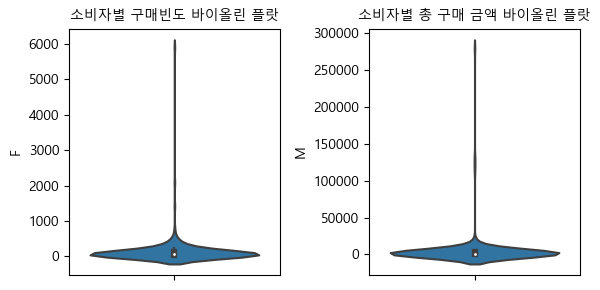

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(6,3))
sns.violinplot(data=customer_df, y='F', ax=ax[0])
sns.violinplot(data=customer_df, y='M', ax=ax[1])
ax[0].set_title('소비자별 구매빈도 바이올린 플랏', fontsize=10)
ax[1].set_title('소비자별 총 구매 금액 바이올린 플랏', fontsize=10)
plt.tight_layout()
plt.show()

[해석]
- 소비자별 구매빈도가 가장 큰 CustomerID는 14911이고, 그 때 횟수는 5903회로 나타났음. 총 구매 금액은 132,572.62원임. 
- 반면에 구매빈도가 가장 작은 CustomerID는 12505와 12503인데, 이들의 총 구매 금액은 음수값으로 나타났음. 금액이 음수값이 나올 수 없으므로 전처리가 필요하다고 판단함.
- 소비자별 구매 금액이 가장 큰 CustomerID는 14646이고, 그 때 금액 279,489.02원로 나타났음. 구매빈도는 2085회임. 
- 반면에 구매 금액이 가장 작은 CustomerID는 12503, 12605, 그리고 12505인데, 음수값으로 나타났음. 금액이 음수값이 나올 수 없으므로 전처리가 필요하다고 판단함. 또한 
- 소비자별 구매빈도와 구매구매의 분포를 확인하기 위해 바이올린 플랏은 구현한 결과, 두 값이 비슷한 분포를 띄고 있음을 확인함.

### 1.2 F, M feature 기반으로 군집분석 실시, 필요시 이상값 보정

In [67]:
# 이상치를 중앙값으로 대체
customer_df.loc[customer_df['M'] <= 1, 'M'] = np.median(customer_df['M'])
customer_df.loc[customer_df['M'] <= 1, 'M']

Series([], Name: M, dtype: float64)

[해석]
- 앞서 확인한 구매금액이 음수이거나 1원이 안되는 CustomerID의 M 컬럼 값을 전체 데이터의 중앙값으로 대체하였음.
- 이외에도 CustomerID의 구매빈도(F)별 평균값으로 대체하는 방법도 있음.

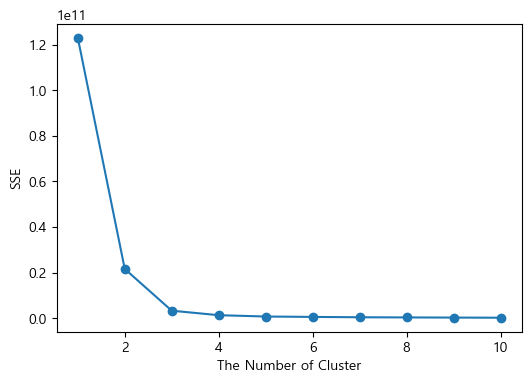

[123045584742.0468, 21591791309.716984, 3277735038.8399935, 1297773885.175243, 717158978.5924046, 540080253.35581, 391933530.70207036, 319666066.70276433, 251785759.6899709, 188180136.12158006]


In [71]:
# 최적의 k값을 찾기 위한 엘보우 기법 구현
from sklearn.cluster import KMeans
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Cluster')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
plt.figure(figsize=(6,4))
elbow(customer_df)

[해석]
- elbow 기법으로 최적의 k값을 확인한 결과, k값이 2에서 3으로 갈 때 기울기 소실이 발생하므로, 해당 데이터에서는 2~3개의 군집이 적당함을 알 수 있음.
- 본 분석에서는 k = 3으로 하여 최종 군집분석을 수행함.

In [70]:
# 최적의 k로 K-Means 군집화 실행
km=KMeans(n_clusters=3, random_state=1)
km.fit(customer_df)

# 할당된 군집을 customer_df 데이터에 추가
new_labels = km.labels_
customer_df['cluster'] = new_labels

customer_df.groupby('cluster').mean()

,CustomerID,F,M
cluster,,,
0,12722.130814,89.645349,2134.697238
1,13827.333333,2700.333333,123227.403333
2,14646.000000,2085.000000,279489.020000


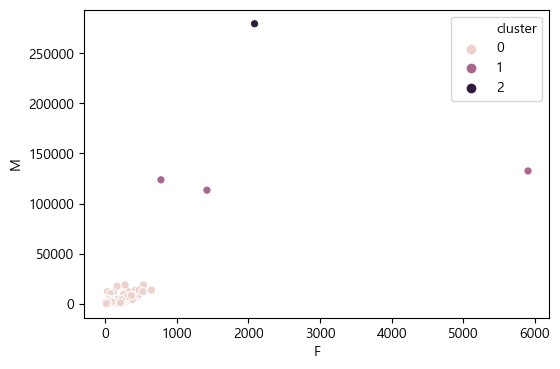

In [74]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=customer_df, x='F', y='M', hue='cluster')
plt.show()

### 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술
**참고자료 / 파이썬 머신런이 완벽가이드 / p.442~449**

[해석]
- 군집화 평가 방법으로 실루엣 분석을 사용할 수 있음.
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타내는데, 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미임.

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 개별 데이터셋에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(customer_df, customer_df['cluster'])

# customer_df에 실루엣 계수 컬럼 추가
customer_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(customer_df, customer_df.cluster)
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
customer_df.head(3)

Silhouette Analysis Score:0.974


,CustomerID,F,M,cluster,silhouette_coeff
0,12348.0,31,1797.24,0,0.983989
1,12349.0,73,1757.55,0,0.984095
2,12350.0,17,334.40,0,0.983508


In [79]:
customer_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.977193
1    0.887297
2    0.000000
Name: silhouette_coeff, dtype: float64

[해석]
- 평균 실루엣 계수는 약 0.974로 나왔음, 데이터의 맨 처음 3개 행은 0번 군집에 해당하고 개별 실루엣 계수 값이 약 0.98로 비슷함.
- 하지만 군집별로 silhouette_coeff 컬럼의 평균을 비교한 결과, 0번 군집은 실루엣 계수 평균 값이 약 0.977인데 반해, 1번 군집은 약 0.887, 2번 군집은 0으로 나왔음.
- 따라서 0, 1번 군집은 같은 군집 내의 데이터와 상대적으로 가깝게 군집되어 있고, 다른 군집에 있는 데이터와는 상대적으로 멀리 군집되어 있다고 할 수 있지만, 2번 군집은 그렇지 않다고 해석할 수 있음.

### 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시
[해석]
- 앞서 확인한 결과처럼 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어서 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 K-평균의 적절한 군집 개수가 잘 설정되었다고 판단할 수 있음.
- 최적의 군집의 개수를 설정하기 위해서 앞서 진행한 이상치 처리 방안을 고려할 필요가 있을 것임. 예를 들어 본 분석에서는 음수에 해당하는 총 구매금액을 전체 데이터의 총 구매금액의 중앙값으로 대체했지만, 구매빈도(F)별 총 구매금액의 중앙값으로 이상치를 대체할 수 것임. 
    - 예들 들어 특정 CustomerID의 구매 횟수(F)가 3이고 이때 총 구매금액(M)이 -1(이상치)이라면, 구매 횟수(F)가 3인 모든 CustomerID의 총 구매금액(M)의 중앙값으로 대체하는 것임.
- 실루엣 계수를 통한 K-평균 군집 평가 방식은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남. 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행한다면 메모리 부족 등의 에러가 발생할 수 있음. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고려해야 함.

## 2. 시계열분석

### 2.1 EDA와 시각화를 진행하라

In [102]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
display(df.head())
print(df.shape)

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5


(300, 1)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  295 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [87]:
df.describe()

,counts
count,295.000000
mean,498.678305
std,97.603920
min,239.400000
25%,432.600000
50%,499.800000
75%,565.550000
max,729.200000


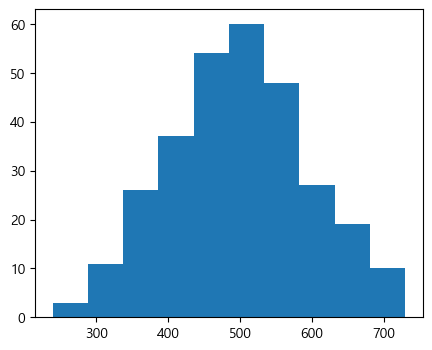

In [103]:
plt.figure(figsize=(5,4))
plt.hist(df);

In [91]:
df.isna().sum()

counts    5
dtype: int64

[해석]
- 데이터는 하나의 컬럼으로 이루어져 있고, float 형으로 확인하였음. 또한 결측치 포함 총 300개의 행으로 구성됨.
- 결측치는 총 5개이며, 추후 결측치를 대체하는 과정이 필요할 것임.
- 데이터의 분포는 정규분포와 비슷하게 종 모양을 띄고 있음.

### 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

In [101]:
df

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


In [ ]:
### 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

### 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안